In [1]:
from pandas import Series,DataFrame
import pandas as pd

In [2]:
file_name = './L5data.xlsx'
xls = pd.ExcelFile(file_name)
dataDF = xls.parse('Sheet1',dtype = 'object')
dataDF.head() #列出前五行数据

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,001616528,236701,强力VC银翘片,6,82.8,69
1,2018-01-02 星期六,001616528,236701,清热解毒口服液,1,28,24.64
2,2018-01-06 星期三,0012602828,236701,感康,2,16.8,15
3,2018-01-11 星期一,0010070343428,236701,三九感冒灵,1,28,28
4,2018-01-15 星期五,00101554328,236701,三九感冒灵,8,224,208


In [3]:
dataDF.shape # 查看数据形状，即几行几列

(6578, 7)

In [4]:
dataDF.index # 查看索引

RangeIndex(start=0, stop=6578, step=1)

In [5]:
dataDF.columns #查看列表头内容

Index(['购药时间', '社保卡号', '商品编码', '商品名称', '销售数量', '应收金额', '实收金额'], dtype='object')

In [6]:
dataDF.count() # 查看每一列统计数目

购药时间    6576
社保卡号    6576
商品编码    6577
商品名称    6577
销售数量    6577
应收金额    6577
实收金额    6577
dtype: int64

In [7]:
dataDF.rename(columns={'购药时间':'销售时间'},inplace=True)
dataDF.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,001616528,236701,强力VC银翘片,6,82.8,69
1,2018-01-02 星期六,001616528,236701,清热解毒口服液,1,28,24.64
2,2018-01-06 星期三,0012602828,236701,感康,2,16.8,15
3,2018-01-11 星期一,0010070343428,236701,三九感冒灵,1,28,28
4,2018-01-15 星期五,00101554328,236701,三九感冒灵,8,224,208


In [8]:
print('删除缺失值前：',dataDF.shape)
dataDF.info()

#使用dropna函数删除缺失值
dataDF = dataDF.dropna(subset={'销售时间','社保卡号'},how = 'any')

print('\n删除缺失值后：',dataDF.shape)
dataDF.info()

删除缺失值前： (6578, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6578 entries, 0 to 6577
Data columns (total 7 columns):
销售时间    6576 non-null object
社保卡号    6576 non-null object
商品编码    6577 non-null object
商品名称    6577 non-null object
销售数量    6577 non-null object
应收金额    6577 non-null object
实收金额    6577 non-null object
dtypes: object(7)
memory usage: 359.9+ KB

删除缺失值后： (6575, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6575 entries, 0 to 6577
Data columns (total 7 columns):
销售时间    6575 non-null object
社保卡号    6575 non-null object
商品编码    6575 non-null object
商品名称    6575 non-null object
销售数量    6575 non-null object
应收金额    6575 non-null object
实收金额    6575 non-null object
dtypes: object(7)
memory usage: 410.9+ KB


In [9]:
# 将字符串转换为浮点型数据
dataDF['销售数量']=dataDF['销售数量'].astype('float')
dataDF['应收金额']=dataDF['应收金额'].astype('float')
dataDF['实收金额']=dataDF['实收金额'].astype('float')
dataDF.dtypes

销售时间     object
社保卡号     object
商品编码     object
商品名称     object
销售数量    float64
应收金额    float64
实收金额    float64
dtype: object

In [10]:
# 定义函数将星期去除
def splitSaletime(timeColser):
    timelist = []
    for val in timeColser:
        data = val.split(' ')[0] # [0]表示选取的分片，这里表示切割完后选取第一个分片
        timelist.append(data)
        
    # 将列表转行为一维数据Series类型
    timeSer = Series(timelist)   
    return timeSer

# 获取"销售时间"这一列数据
time = dataDF.loc[:,'销售时间']
# 调用函数去除星期，获得日期
data = splitSaletime(time)
# 修改"销售时间"这一列的值
dataDF.loc[:,'销售时间'] = data
dataDF.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01,001616528,236701,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02,001616528,236701,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06,0012602828,236701,感康,2.0,16.8,15.00
3,2018-01-11,0010070343428,236701,三九感冒灵,1.0,28.0,28.00
4,2018-01-15,00101554328,236701,三九感冒灵,8.0,224.0,208.00


In [11]:
# 字符串转日期
'''
errors='coerce'如果原始数据不符合日期的格式，转换后的值为NaT
format 是原始数据中日期的格式
'''
dataDF.loc[:,'销售时间'] = pd.to_datetime(dataDF.loc[:,'销售时间'],format='%Y-%m-%d',errors='coerce')
dataDF.dtypes

销售时间    datetime64[ns]
社保卡号            object
商品编码            object
商品名称            object
销售数量           float64
应收金额           float64
实收金额           float64
dtype: object

In [12]:
'''
转换日期过程中不符合日期格式的数值会被转换为空值None，
这里删除列（销售时间，社保卡号）中为空的行
'''
dataDF = dataDF.dropna(subset=['销售时间','社保卡号'],how='any')

In [13]:
# 按销售时间进行升序排序
dataDF = dataDF.sort_values(by='销售时间',ascending=True)
dataDF.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01,001616528,236701,强力VC银翘片,6.0,82.8,69.0
3436,2018-01-01,0010616728,865099,硝苯地平片(心痛定),2.0,3.4,3.0
1190,2018-01-01,0010073966328,861409,非洛地平缓释片(波依定),5.0,162.5,145.0
3859,2018-01-01,0010073966328,866634,硝苯地平控释片(欣然),6.0,111.0,92.5
3888,2018-01-01,0010014289328,866851,缬沙坦分散片(易达乐),1.0,26.0,23.0


In [14]:
# 重置索引（index）
dataDF = dataDF.reset_index(drop=True)
dataDF.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01,001616528,236701,强力VC银翘片,6.0,82.8,69.0
1,2018-01-01,0010616728,865099,硝苯地平片(心痛定),2.0,3.4,3.0
2,2018-01-01,0010073966328,861409,非洛地平缓释片(波依定),5.0,162.5,145.0
3,2018-01-01,0010073966328,866634,硝苯地平控释片(欣然),6.0,111.0,92.5
4,2018-01-01,0010014289328,866851,缬沙坦分散片(易达乐),1.0,26.0,23.0


In [15]:
# 查看描述统计信息
dataDF.describe()

,销售数量,应收金额,实收金额
count,6549.000000,6549.000000,6549.000000
mean,2.384486,50.449076,46.284370
std,2.375227,87.696401,81.058426
min,-10.000000,-374.000000,-374.000000
25%,1.000000,14.000000,12.320000
50%,2.000000,28.000000,26.500000
75%,2.000000,59.600000,53.000000
max,50.000000,2950.000000,2650.000000


In [16]:
# 将"销售数量"这一列中小于0的数排除掉
pop = dataDF.loc[:,'销售数量'] > 0
dataDF = dataDF.loc[pop,:]

# 排除异常值后再次查看描述统计信息
dataDF.describe()

,销售数量,应收金额,实收金额
count,6506.000000,6506.000000,6506.000000
mean,2.405626,50.927897,46.727653
std,2.364565,87.650282,80.997726
min,1.000000,1.200000,0.030000
25%,1.000000,14.000000,12.600000
50%,2.000000,28.000000,27.000000
75%,2.000000,59.600000,53.000000
max,50.000000,2950.000000,2650.000000


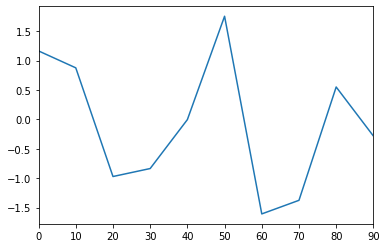

In [17]:
import pandas as pd
import numpy as np
%matplotlib inline
s = pd.Series(np.random.randn(10), index = np.arange(0,100,10))
s.plot()

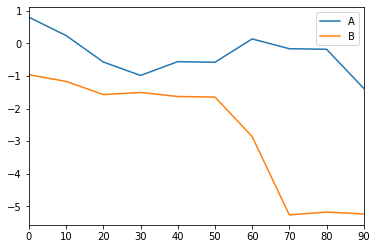

In [18]:
df = pd.DataFrame(np.random.randn(10,2).cumsum(0),
                  columns=['A','B'],
                  index=np.arange(0,100,10))
df.plot()

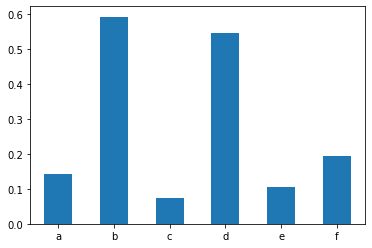

In [19]:
import pylab as pl
data = pd.Series(np.random.rand(6),index=list('abcdef'))
data.plot.bar(rot=360)

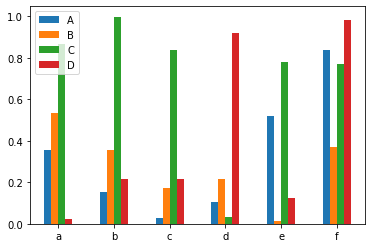

In [20]:
df = pd.DataFrame(np.random.rand(6,4),
                  index=['a','b','c','d','e','f'],
                  columns=pd.Index(['A','B','C','D']))
df.plot.bar(rot=360)

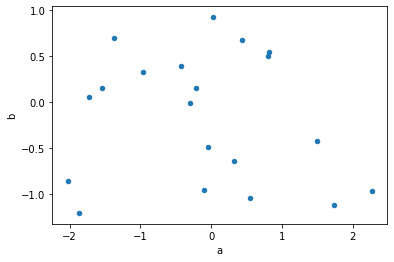

In [21]:
df = pd.DataFrame(np.random.randn(20,2), columns=['a','b'])
df.plot.scatter(x='a', y='b')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119c21810>],
      dtype=object)

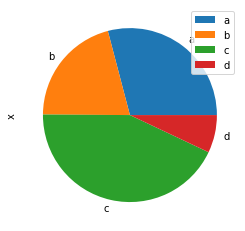

In [22]:
df = pd.DataFrame(np.random.rand(4),
                  index=['a','b','c','d'],
                  columns=['x'])
df.plot.pie(subplots=True)

In [23]:
# 构建模型及数据可视化

# 业务指标1：月均消费次数

# 计算总消费次数

# 删除重复数据
kpi1_Df = dataDF.drop_duplicates(subset=['销售时间','社保卡号'])
# 有多少行
totalI = kpi1_Df.shape[0]
print('总消费次数=',totalI)

总消费次数= 5342


In [24]:
# 计算月份数
# 排序
# 销售时间
monthDF = dataDF
monthDF.index = monthDF['销售时间']
#按月份聚合
months = monthDF.groupby(monthDF.index.month)
monthsID = months.sum().index
monthsI = monthsID.size
print('月份数：',monthsI)

月份数： 7


In [25]:
# 计算月均消费次数

kpi1_I = totalI // monthsI
print('业务指标1：月均消费次数=',kpi1_I)

业务指标1：月均消费次数= 763


In [26]:
#### 业务指标2：月均消费金额

# 总消费金额
totalMoneyF = dataDF.loc[:,'实收金额'].sum()
# 月均消费金额
monthMoneyF = totalMoneyF // monthsI
print('业务指标2：月均消费金额=',monthMoneyF)

业务指标2：月均消费金额= 43430.0


In [27]:
#### 业务指标3：客单价

# 客单价 = 总消费金额 / 总消费次数
pct = totalMoneyF / totalI
print('业务指标3：客单价=',pct)

业务指标3：客单价= 56.909417821040805


In [28]:
#### 业务指标4：消费趋势

# 分析每天的消费金额
# 在操作之前重新复制一份数据，作为备用
groupDF = dataDF
groupDF.index = groupDF['销售时间']
groupDF.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
销售时间,,,,,,,
2018-01-01,2018-01-01,001616528,236701,强力VC银翘片,6.0,82.8,69.0
2018-01-01,2018-01-01,0010616728,865099,硝苯地平片(心痛定),2.0,3.4,3.0
2018-01-01,2018-01-01,0010073966328,861409,非洛地平缓释片(波依定),5.0,162.5,145.0
2018-01-01,2018-01-01,0010073966328,866634,硝苯地平控释片(欣然),6.0,111.0,92.5
2018-01-01,2018-01-01,0010014289328,866851,缬沙坦分散片(易达乐),1.0,26.0,23.0


[Text(0, 0.5, '实收金额'), Text(0.5, 0, '销售时间')]

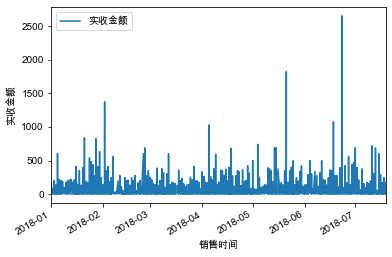

In [29]:
# 画图时用于显示中文字符
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']   # SimHei是黑体
mpl.rcParams["font.family"] = 'Arial Unicode MS' #mac下的中文字体
mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号
df = pd.DataFrame(groupDF['实收金额'],index=groupDF.index)
df.plot().set(xlabel = '销售时间', ylabel = '实收金额')

In [30]:
# ### 每月的消费金额
# 将销售时间聚合按月分组
gb = groupDF.groupby(groupDF.index.month)
monthDF = gb.sum()
print(monthDF)

        销售数量     应收金额      实收金额
销售时间                           
1     2527.0  53561.6  49461.19
2     1858.0  42028.8  38790.38
3     2225.0  45318.0  41597.51
4     3005.0  54296.3  48787.84
5     2225.0  51263.4  46925.27
6     2328.0  52300.8  48327.70
7     1483.0  32568.0  30120.22


[Text(0, 0.5, '实收金额'), Text(0.5, 0, '销售时间')]

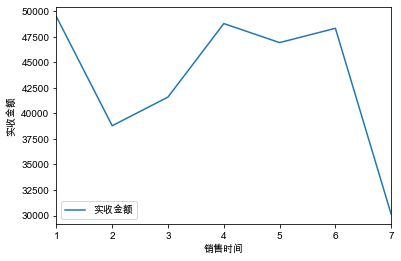

In [31]:
#绘制按月消费金额图
month = pd.DataFrame(monthDF['实收金额'])
month.plot().set(xlabel='销售时间',ylabel='实收金额')

In [32]:
# ###药品销售情况
# 聚合统计各种药品的销售数量
medicine = groupDF[['商品名称','销售数量']]
bk = medicine.groupby('商品名称')[['销售数量']]
re_medicine = bk.sum()

# 对药品销售数量按降序排序
re_medicine = re_medicine.sort_values(by='销售数量',ascending=False)
re_medicine.head()

,销售数量
商品名称,
苯磺酸氨氯地平片(安内真),1781.0
开博通,1440.0
酒石酸美托洛尔片(倍他乐克),1140.0
硝苯地平片(心痛定),825.0
苯磺酸氨氯地平片(络活喜),796.0


In [33]:
# 截取销售数量最多的十种药品
top_medicine = re_medicine.iloc[:10,:]
print(top_medicine)

                     销售数量
商品名称                     
苯磺酸氨氯地平片(安内真)      1781.0
开博通                1440.0
酒石酸美托洛尔片(倍他乐克)     1140.0
硝苯地平片(心痛定)          825.0
苯磺酸氨氯地平片(络活喜)       796.0
复方利血平片(复方降压片)       515.0
G琥珀酸美托洛尔缓释片(倍他乐克)   509.0
缬沙坦胶囊(代文)           445.0
非洛地平缓释片(波依定)        375.0
高特灵                 366.0


[Text(0, 0.5, '销售数量'), Text(0.5, 0, '商品名称')]

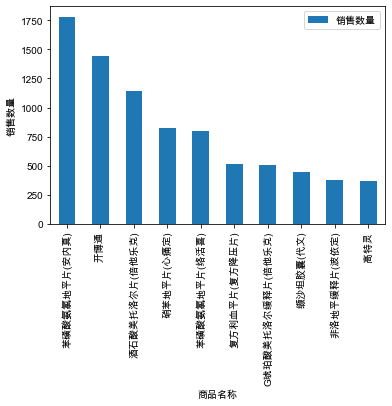

In [34]:
# 用条形图展示销售数量前十的药品
month = pd.DataFrame(top_medicine['销售数量'])
month.plot.bar().set(xlabel='商品名称',ylabel='销售数量')